In [ ]:
гит: https://github.com/Starratel/praktishka

In [ ]:
датасет: https://grouplens.org/datasets/movielens/100k/

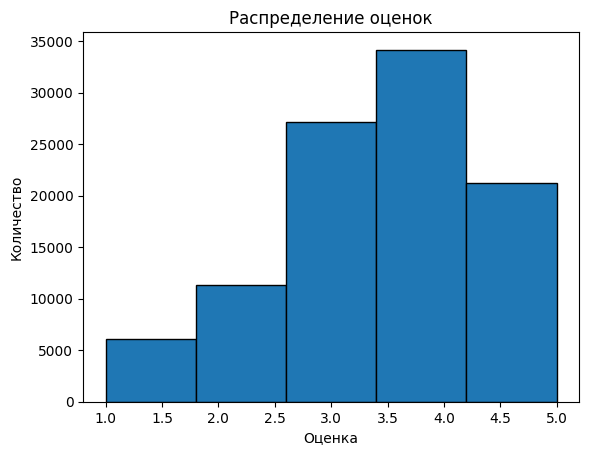

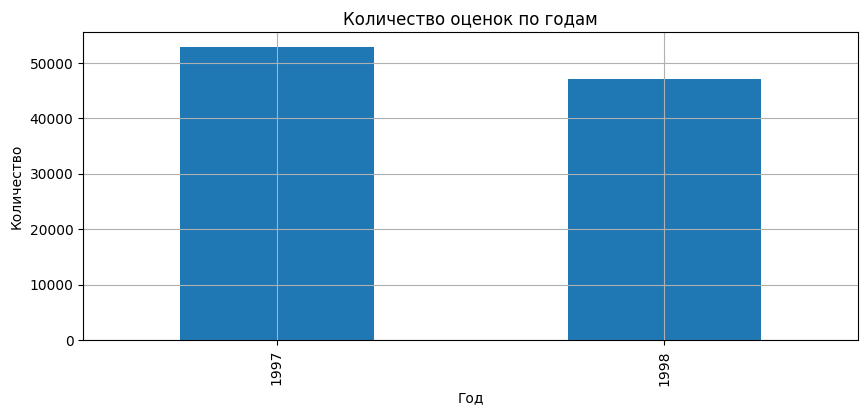

📌 RMSE: 1.0179
📌 MAE : 0.8150
📌 R²   : 0.1796
📊 Средний RMSE по CV: 1.0308


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

df = pd.read_csv('/content/u.data', sep='\t', names=['userId', 'movieId', 'rating', 'timestamp'])

df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df['year'] = df['datetime'].dt.year

plt.hist(df['rating'], bins=5, edgecolor='black')
plt.title("Распределение оценок")
plt.xlabel("Оценка")
plt.ylabel("Количество")
plt.show()

df.groupby('year')['rating'].count().plot(kind='bar', figsize=(10,4))
plt.title("Количество оценок по годам")
plt.xlabel("Год")
plt.ylabel("Количество")
plt.grid(True)
plt.show()

le_user = LabelEncoder()
le_movie = LabelEncoder()

df['userId_encoded'] = le_user.fit_transform(df['userId'])
df['movieId_encoded'] = le_movie.fit_transform(df['movieId'])

X = df[['userId_encoded', 'movieId_encoded']]
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=30, max_depth=10, random_state=42, n_jobs=-1)
xgb = XGBRegressor(n_estimators=30, max_depth=6, random_state=42, verbosity=0)
lr = LinearRegression()

stack = StackingRegressor(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=lr,
    n_jobs=-1
)

stack.fit(X_train, y_train)

y_pred = stack.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📌 RMSE: {rmse:.4f}")
print(f"📌 MAE : {mae:.4f}")
print(f"📌 R²   : {r2:.4f}")

cv_scores = cross_val_score(stack, X, y, cv=3, scoring='neg_root_mean_squared_error')
print(f"📊 Средний RMSE по CV: {abs(cv_scores.mean()):.4f}")
